<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_47_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción para acertar la lotería

## 🌟 Descripción general

Imagina que eres parte del equipo de **análisis predictivo de una empresa de juegos de azar**.

Tu tarea es desarrollar un sistema capaz de analizar combinaciones de lotería y estimar cuáles tienen **más probabilidad de éxito**, utilizando inteligencia artificial.

Para ello, crearás un modelo de clasificación con `RandomForestClassifier` que aprenda de datos históricos simulados, y luego lo aplicarás a nuevas combinaciones para seleccionar las mejores.



## 📌 Objetivos del proyecto

Desarrollar una aplicación completa compuesta por varias clases, que sea capaz de:

  + 1.- **Simular combinaciones** de lotería (con 6 números únicos entre 1 y 49).
  + 2.- **Generar datos** de entrenamiento con etiquetas de "éxito" (1) o "fracaso" (0), simulando que el 10% de las combinaciones históricas fueron ganadoras.
  + 3.- **Entrenar un modelo** de machine learning para predecir la probabilidad de éxito.
  + 4.- **Aplicar el modelo** a nuevas combinaciones aleatorias.
  + 5.- **Mostrar la mejor combinación** según el modelo.
  + 6.- **Visualizar** en una gráfica las **10 combinaciones** con mayor probabilidad de éxito.



## 🧱 Clases que debes implementar

+ ### 1.  Clase `GeneradorSeries`. Responsable de generar combinaciones aleatorias:

  + Método `generar_series(cantidad)`: genera `cantidad` combinaciones de 6 números únicos aleatorios entre 1 y 49.

  + Cada combinación debe estar ordenada para mayor coherencia visual.

<br>

+ ### 2. Clase `DatosLoteria`. Encargada de crear los datos de entrenamiento:

  + Método `generar_datos_entrenamiento(cantidad=1000)`: genera un DataFrame con `1000` combinaciones y una columna adicional llamada `"Exito"` con valores 1 (éxito) o 0 (fracaso), simulando que el 10% de las combinaciones fueron ganadoras.

<br>

+ ### 3. Clase `ModeloLoteria`. Encargada de construir y entrenar el modelo predictivo:

  + Entrena un modelo de `RandomForestClassifier`.

  + Métodos:

    + `entrenar(X, y)`: entrena el modelo con los datos escalados.

    + `predecir_probabilidades(X)`: devuelve las probabilidades de éxito para cada combinación evaluada.



+ ### 4. Clase `VisualizadorResultados`. Responsable de mostrar los resultados en un gráfico:

  + Método `graficar_top_combinaciones(df_series, probabilidades, top_n=10)`:

    + Muestra un gráfico de barras horizontal con las 10 combinaciones más prometedoras.

    + Usa matplotlib.pyplot.



+ ### 5. Clase `EjecutarSimulacion`. Clase principal que ejecuta todo el flujo del proyecto:

  Método `ejecutar()`:
    + Genera los datos simulados.
    + Entrena el modelo.
    + Genera nuevas combinaciones a evaluar.
    + Predice la probabilidad de éxito.
    + Muestra por pantalla la mejor combinación encontrada.
    + Muestra un gráfico con las 10 más prometedoras.



## 📌 Requisitos técnicos

  + Utiliza pandas y numpy para manipular datos.

  + Usa RandomForestClassifier de sklearn.ensemble.

  + Escala las características numéricas con StandardScaler.

  + Crea gráficos con matplotlib.pyplot.



## 🎯 Ejemplo de uso
```python
simulacion = EjecutarSimulacion()
simulacion.ejecutar()
```

## Salida esperada
```python
🎯 Mejor serie encontrada:
Números: [7, 35, 39, 41, 43, 47]
Probabilidad estimada de éxito: 0.4300
```

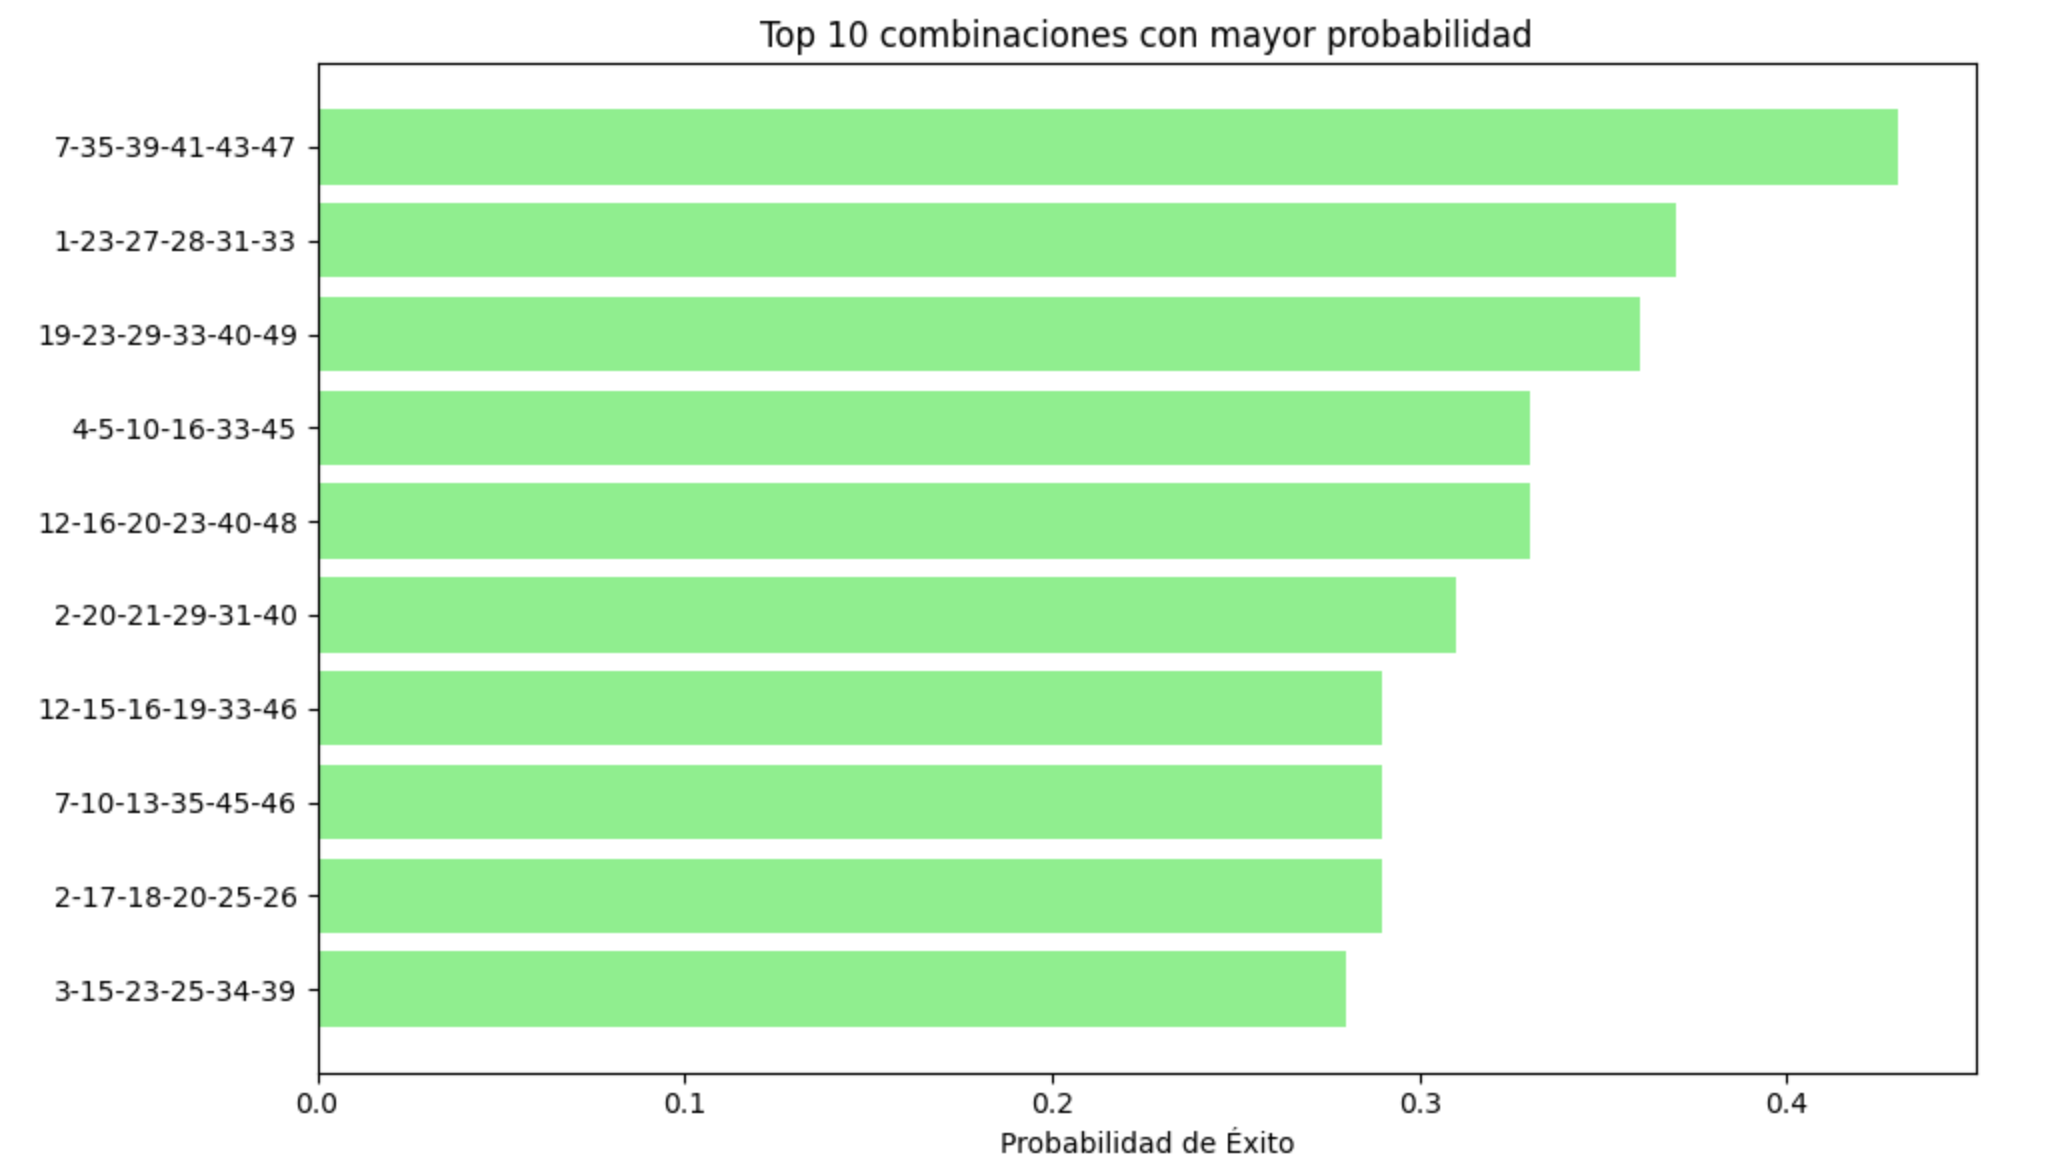

## Importación de las librerías

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


## Definición de la clase GeneradorSeries

In [330]:
class GeneradorSeries:
    """
    Clase responsable de generar combinaciones aleatorias de números de lotería.
    """
    def generar_series(self, cantidad):
        """
        Genera una cantidad especificada de combinaciones únicas de 6 números
        aleatorios entre 1 y 49.

        Cada combinación se genera sin repetición de números y se ordena
        de forma ascendente.

        Args:
            cantidad (int): El número de combinaciones a generar.

        Returns:
            list: Una lista de listas, donde cada lista interna representa
                  una combinación de 6 números de lotería ordenados.
        """
        series = []
        for _ in range(cantidad):
            combinacion = np.random.choice(range(1, 50), size=6, replace=False)
            combinacion.sort()
            series.append(combinacion.tolist())
        return series

In [323]:
gs = GeneradorSeries()
gs.generar_series(10)

[[14, 21, 27, 29, 45, 46],
 [7, 23, 24, 37, 43, 44],
 [3, 8, 11, 15, 26, 32],
 [7, 13, 40, 47, 48, 49],
 [8, 24, 26, 36, 37, 41],
 [1, 7, 22, 33, 47, 48],
 [1, 21, 25, 34, 37, 43],
 [2, 13, 14, 27, 31, 43],
 [2, 14, 16, 27, 33, 47],
 [1, 3, 18, 27, 30, 37]]

## Definición clase DatosLotería

In [324]:
class DatosLoteria:
    def __init__(self):
        self.loteri = None
        self.series = None
        self.exitos = None
        self.generador = GeneradorSeries()
    def generar_datos_entrenamiento(self, cantidad = 1000):
        self.series = pd.DataFrame(self.generador.generar_series(cantidad),columns=['n1', 'n2', 'n3', 'n4', 'n5', 'n6'])
        self.exitos = pd.DataFrame(np.random.choice([0,1], cantidad, replace=True, p=[0.9,0.1]), columns=['Exito'])
        self.loteri = pd.concat([self.series, self.exitos], axis=1)
        return self.loteri


In [325]:
dl = DatosLoteria()
loteria =dl.generar_datos_entrenamiento(10)
loteria.head(10)

,n1,n2,n3,n4,n5,n6,Exito
0,3,9,25,34,38,43,0
1,8,11,19,32,37,43,0
2,22,26,28,33,38,49,0
3,7,23,24,34,43,48,0
4,4,21,22,30,37,43,0
5,3,5,10,22,25,42,0
6,6,15,24,31,32,39,0
7,1,11,17,27,32,33,0
8,2,15,16,18,31,33,0
9,4,8,28,44,47,48,0


## Definición clase ModeloLoteria

In [326]:
class ModeloLoteria:
    """
    Clase encargada de construir, entrenar y utilizar un modelo de machine learning
    (RandomForestClassifier) para predecir la probabilidad de éxito de
    combinaciones de lotería.
    """
    def __init__(self):
        """
        Inicializa una nueva instancia de la clase ModeloLoteria.

        Se crea una instancia de RandomForestClassifier y StandardScaler.
        """
        self.modelo = None
        self.scaler = StandardScaler()

    def entrenar(self, X, y):
        """
        Entrena el modelo RandomForestClassifier con los datos proporcionados.

        Las características (X) son escaladas utilizando StandardScaler antes
        de entrenar el modelo.

        Args:
            X (np.ndarray or pd.DataFrame): Las características de entrenamiento
                                            (combinaciones de números).
            y (np.ndarray or pd.Series): Las etiquetas de entrenamiento (0 para fracaso,
                                         1 para éxito).
        """
        # Escalar las características antes de entrenar
        self.modelo = RandomForestRegressor(n_estimators = 80)

        # Transformaos el np.array devuelto por el Scaler en un DataFrame
        X_train_scaled = pd.DataFrame(self.scaler.fit_transform(X), columns=X.columns, index=X.index)

        self.modelo.fit(X_train_scaled,y)

    def predecir_probabilidades(self, X):
        """
        Predice la probabilidad de éxito para nuevas combinaciones utilizando
        el modelo entrenado.

        Las nuevas combinaciones (X) son escaladas utilizando el mismo
        StandardScaler utilizado durante el entrenamiento antes de realizar
        la predicción.

        Args:
            X (np.ndarray or pd.DataFrame): Las combinaciones de números a evaluar.

        Returns:
            np.ndarray: Un array de NumPy con las probabilidades estimadas de
                        éxito para cada combinación de entrada.
                        La probabilidad de éxito (clase 1) es la segunda columna
                        del array devuelto por predict_proba.
        """
        # Escalar las nuevas combinaciones usando el mismo escalador
        X_test_scaled = pd.DataFrame(self.scaler.fit_transform(X), columns=X.columns, index=X.index)
        return self.modelo.predict(X_test_scaled)

## Definición de la clase VisualizadorResultados

In [327]:
class VisualizadorResultados:
  """
    Clase responsable de visualizar los resultados de la predicción del modelo
    en un gráfico.
  """
  def graficar_top_combinaciones(self, df_series, proba_df, top_n=10):
    """
    Muestra un gráfico de barras horizontal con las top_n combinaciones
    con la mayor probabilidad estimada de éxito.

    Las combinaciones se extraen de df_series y sus probabilidades
    correspondientes de proba_df.

    Args:
        df_series (pd.DataFrame): DataFrame que contiene las combinaciones
                                  de números de lotería. Se espera que cada fila
                                  sea una combinación y cada columna un número.
        proba_df (pd.DataFrame or pd.Series): DataFrame o Serie que contiene
                                              las probabilidades de éxito para cada
                                              combinación en df_series.
                                              Se espera que tenga una columna con las probabilidades.
        top_n (int, optional): El número de las mejores combinaciones a mostrar.
                                Por defecto es 10.
    """

    df_plot = pd.concat([df_series, proba_df], axis=1)

    df_plot.columns = ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'Probabilidad']
    # Ordenamos decrecientemente y extraemos las top_n
    df_plot_top = df_plot.sort_values(by='Probabilidad', ascending=False).head(top_n)

    # Ordenamos ascendentemente para imitar el grafico del enunciado
    df_plot_top.sort_values(by='Probabilidad', ascending=True, inplace=True)

    # Creamos las etiquetas concatenando las features con un f-string
    df_plot_top['label'] = df_plot_top.apply(lambda row: f"{int(row['n1'])}-{int(row['n2'])}-{int(row['n3'])}-{int(row['n4'])}-{int(row['n5'])}-{int(row['n6'])}", axis=1)

    # Generamos el tráfico
    plt.figure(figsize=(10, 6))
    plt.barh(df_plot_top['label'], df_plot_top['Probabilidad'])
    plt.xlabel('Probabilidad de Éxito')
    plt.ylabel('Combinación')
    plt.title(f'Top {top_n} Combinaciones con Mayor Probabilidad')
    plt.show()

## Definición de la clase EjecutarSimulacion

In [328]:
class EjecutarSimulacion:
  def __init__(self):
    self.generador_entrenar = DatosLoteria()
    self.datos_entrenar = None
    self.datos_predecir = None
    self.modelo_loteria = ModeloLoteria()
    self.visualizador_resultados = VisualizadorResultados()
  def ejecutar(self):
    np.random.seed(42)
    self.datos_entrenar = self.generador_entrenar.generar_datos_entrenamiento()
    X = self.datos_entrenar.drop('Exito', axis=1)
    y = self.datos_entrenar['Exito']
    self.modelo_loteria.entrenar(X, y)


    np.random.seed(43)
    self.datos_predecir = self.generador_entrenar.generar_datos_entrenamiento()
    X = self.datos_predecir.drop('Exito', axis=1)
    y = self.datos_predecir['Exito']
    probabilidades = self.modelo_loteria.predecir_probabilidades(X)


    proba_df = pd.DataFrame(probabilidades, columns=['Probabilidad'], index=X.index)
    print(type(X), type(proba_df))
    df_plot = pd.concat([X, proba_df], axis=1)
    print(df_plot.head())
    self.visualizador_resultados.graficar_top_combinaciones(X, proba_df)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
   n1  n2  n3  n4  n5  n6  Probabilidad
0   7  14  15  27  34  39        0.2000
1   1   3  10  21  26  42        0.0000
2   1   8  12  27  33  34        0.1500
3   5   6  11  18  26  36        0.0000
4   4  18  22  28  42  48        0.1875
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
   n1  n2  n3  n4  n5  n6  Probabilidad
0   7  14  15  27  34  39        0.2000
1   1   3  10  21  26  42        0.0000
2   1   8  12  27  33  34        0.1500
3   5   6  11  18  26  36        0.0000
4   4  18  22  28  42  48        0.1875


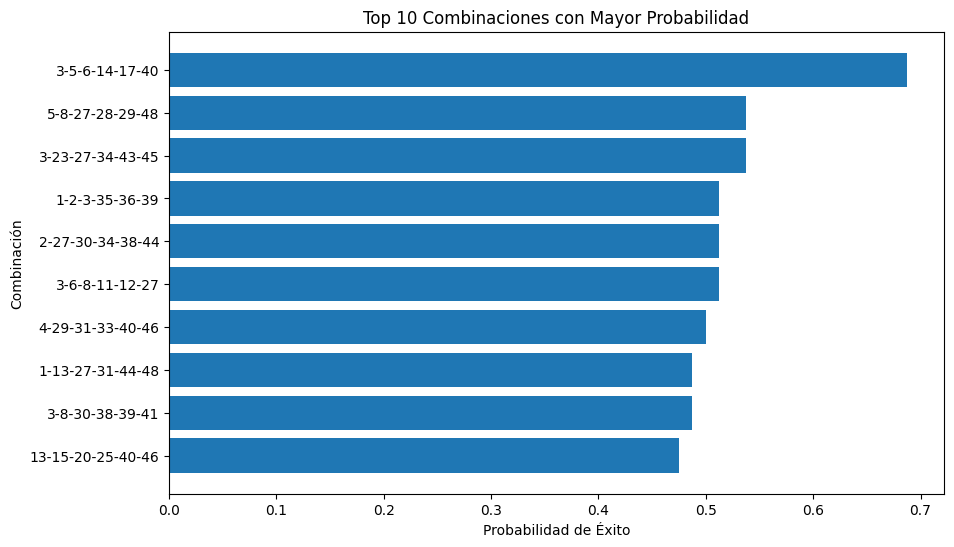

In [329]:
es = EjecutarSimulacion()
es.ejecutar()